# (Notebook still in progress) 

Main question: to analyse the relations between our focus variable and remaining ones

## Index

In [1]:
# TODO

## Heart Failure
#### Brief description

In [2]:
# TODO

## Previous Data Dictionary *(Given by the Kaggle's source)*

|Column|Description|
|------|-----------|
|*Age*|Age of the patient|
|*Age Group*|Such as 21-30 and 31-40 are grouped|
|*Gender*|Sex of the patient|
|*Locality*|Rural or Urban|
|*Marital status*|Married or unmarried|
|*Smoking*|yes/no|
|*Depression*|yes/no|
|*Mortality*|Died= 0 and Alive= 1|
|*Follow.Up*|Number of visiting time|
|*cp*|Chest Pain type chest pain type|
|*Diabetes*|Yes = 0 and No = 1|
|*chol*|cholestoral in mg/dl fetched via BMI sensor|
|*fbs*|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|*trestbps*|resting blood pressure (in mm Hg)|
|*rest_ecg*|resting electrocardiographic results|
|--------|Value 0: normal|
|--------|Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)|
|--------|Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
|*thalach*|maximum heart rate achieved|


In [3]:
# TODO

Due the lack of information found on the data dictionary of Kaggle Dataset's page. I've researched some variables by myself to account for that.

## Dataset overview

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from platform import python_version
%matplotlib inline

print("--Packages Loaded!--")
print("Python version: {}".format(python_version()))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))

--Packages Loaded!--
Python version: 3.9.7
Pandas version: 1.4.3
Numpy version: 1.21.5
Matplotlib version: 3.5.1
Seaborn version: 0.11.2


Aiming to pratice my Data Analytics skills, I'm going to use just 13 variables from the dataset.
<br>
**I will be looking to improve this analysis in the future!**

In [5]:
# Reading the dataset

df = pd.read_csv("FIC.Full.csv", sep=",", low_memory=False)

# Print the first 5 rows from the dataset
df.head(5)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [6]:
print("This dataset has {} rows and {} cloumns.".format(df.shape[0], df.shape[1]))

This dataset has 368 rows and 60 cloumns.


Since there are *60 columns* on this Dataset, let's start by choosing the variables that we are going to explore further.

In [7]:
# Transposing the first 5 rows from the dataset for better viewing and understanding

df.head(5).transpose()

,0,1,2,3,4
Age,45,51,55,55,56
Age.Group,41-50,51-60,51-60,51-60,51-60
Gender,Female,Female,Female,Female,Female
Locality,RURAL,URBAN,RURAL,RURAL,RURAL
Marital status,MARRIED,MARRIED,MARRIED,MARRIED,MARRIED
Life.Style,NO,NO,YES,YES,YES
Sleep,NO,NO,YES,YES,NO
Category,FREE,FREE,FREE,FREE,FREE
Depression,YES,YES,YES,YES,YES
Hyperlipi,YES,YES,YES,YES,YES


After looking through the columns and searching their meanings, I've choosen to use these variables for my EDA:<br>
'Age', 'Gender', 'Depression', 'Smoking', 'Family.History', 'Diabetes', 'C.P.K', 'Hemoglobin', 'trestbps', 'chol', 'thalach', 'Hyperlipi', 'PLATELET_COUNT' and 'Mortality'.<br>
These **13 columns** are going to be considered along with the EDA.

In [8]:
# Creating a new DataFrame with the choosen columns

df = df[['Age','Gender','Depression','Smoking','Family.History','Diabetes',
    'C.P.K','Hemoglobin','trestbps','chol','thalach','Hyperlipi','PLATELET_COUNT','Mortality']]

In [9]:
# Changing columns names

df.rename(columns={"C.P.K":"CPK","trestbps":"BloodPressRest","chol":"cholestoral","thalach":"MaxHeartRate"
                   ,"PLATELET_COUNT":"PlateletCount"}, inplace=True)

### Statistics overview

In [10]:
# Looking over the statistcs

df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Age,368.0,54.3,8.7,24.0,50.8,55.0,60.2,77.0
Diabetes,368.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
CPK,368.0,553.9,957.6,52.0,135.0,188.0,390.0,4289.0
Hemoglobin,368.0,13.9,2.2,9.1,12.3,14.2,15.5,18.0
BloodPressRest,368.0,132.7,18.2,100.0,120.0,130.0,142.0,200.0
cholestoral,368.0,248.9,50.1,131.0,212.0,249.0,283.0,409.0
MaxHeartRate,368.0,140.9,23.0,71.0,125.0,144.0,158.0,195.0
PlateletCount,368.0,248660.3,76707.6,20000.0,192000.0,237000.0,287000.0,459000.0
Mortality,368.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


Despite of the 13 cloumns present in the dataset, the *describe()* method only show us 9 columns. That occurs because it is only applicable to the numeric columns!

### Null Values


In [11]:
# Checking for NULL values

df.isna().sum()

Age               0
Gender            0
Depression        0
Smoking           0
Family.History    0
Diabetes          0
CPK               0
Hemoglobin        0
BloodPressRest    0
cholestoral       0
MaxHeartRate      0
Hyperlipi         0
PlateletCount     0
Mortality         0
dtype: int64

It seems there aren't any NULL values

### Data types

In [12]:
# Checking for data types in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             368 non-null    int64  
 1   Gender          368 non-null    object 
 2   Depression      368 non-null    object 
 3   Smoking         368 non-null    object 
 4   Family.History  368 non-null    object 
 5   Diabetes        368 non-null    int64  
 6   CPK             368 non-null    int64  
 7   Hemoglobin      368 non-null    float64
 8   BloodPressRest  368 non-null    int64  
 9   cholestoral     368 non-null    int64  
 10  MaxHeartRate    368 non-null    int64  
 11  Hyperlipi       368 non-null    object 
 12  PlateletCount   368 non-null    int64  
 13  Mortality       368 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 40.4+ KB


Our **Mortality** variable will be the focus of this EDA, wich represents if the pacient is alive (1) or has died (0).

## Exploratory Analysis


We will reverse these Mortality and Dibetes values (1;0), in order to establish it as default is the fact that in the <span style="color:blue">presence</span> of the respective condition the <span style="color:blue">value 1</span> is going to be assigned, and in the <span style="color:red">absence</span> of the same the <span style="color:red">value 0</span> is going to be assigned.

In [13]:
# Reversing the values from "Diabetes" and "Mortality"
df["Diabetes"].replace({1:0, 0:1}, inplace=True)
df["Mortality"].replace({1:0, 0:1}, inplace=True)

In [21]:
# Creating a copy dataframe replacing categorical variables for dummies
df_numeric = df.copy()

# Setting all the "NO" values to 0, and all the "YES" values to 1
df_numeric = df_numeric.replace({"YES":1, "NO":0})

## Univariate and Bivariate Analysis


In this part, I am going to analyse each variable (each column) by plotting it's corresponding distribution plot first. Then, I am going to analyse the relation between the current variable with the focused one (Mortality).
<br>
Also, aiming to better reading the graphs below, I will consider when <span style="color:blue">Mortality = 0</span>, that it means that <span style="color:blue">the person has survived</span> from the Heart Failure event; and, when <span style="color:red">Mortality = 1</span>, that it means that <span style="color:red">the person hasn't survived</span> from the Heart Faliure event.

### Age

#### Univariate

<Figure size 1440x360 with 0 Axes>

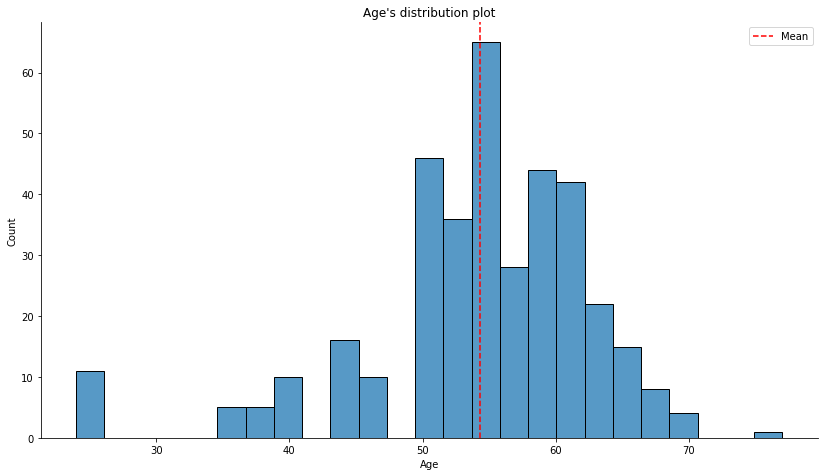

In [94]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.displot(data=df_numeric, x="Age", height=6.5, aspect=16/9, bins=25)

# Setting a mean line
mean_line = plt.axvline(x=df_numeric["Age"].mean(), color='red', ls='--', lw=1.5, label="Mean")

# Setting plot's title
graph.set(title="Age's distribution plot")

# Plotting legend for the mean line
plt.legend()

# Showing plot on JupyterNotebook
plt.show()

There is a higher concentration of individuals on the 50s - 60s range, that explains the mean between this range. With less individuals around 30 years old.

#### Bivariate

<Figure size 1440x360 with 0 Axes>

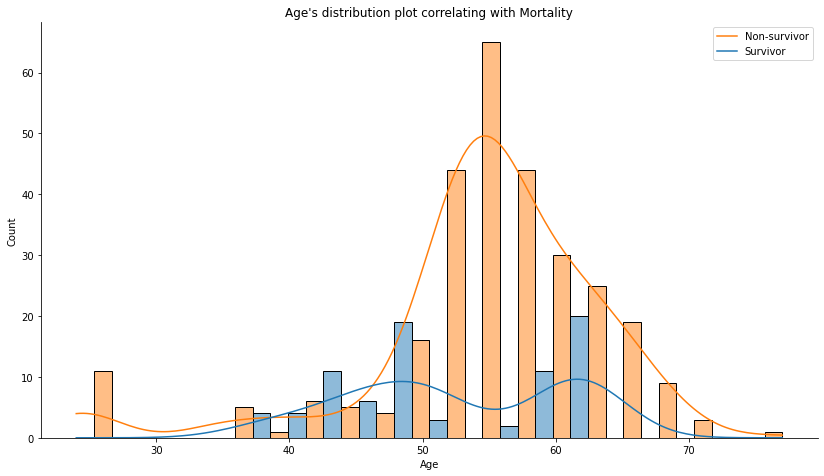

In [97]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.displot(data=df_numeric, x="Age", kde=True, hue="Mortality", multiple="dodge", height=6.5, aspect=16/9, legend= False)

# Setting plot's title
graph.set(title="Age's distribution plot correlating with Mortality")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

It looks like there was a higher concentration of mortality around the ages 50 - 65. But we need to be careful when analysing this graph, because it is only accounting for the total of non-survivors (Mortality = Yes) and survivors (Mortality = No) by their age, not considering the total people by age. <br> To better understand this relationship we are going to create a new plot where we can see the relative mortality's couting for each group.

<Figure size 1440x360 with 0 Axes>

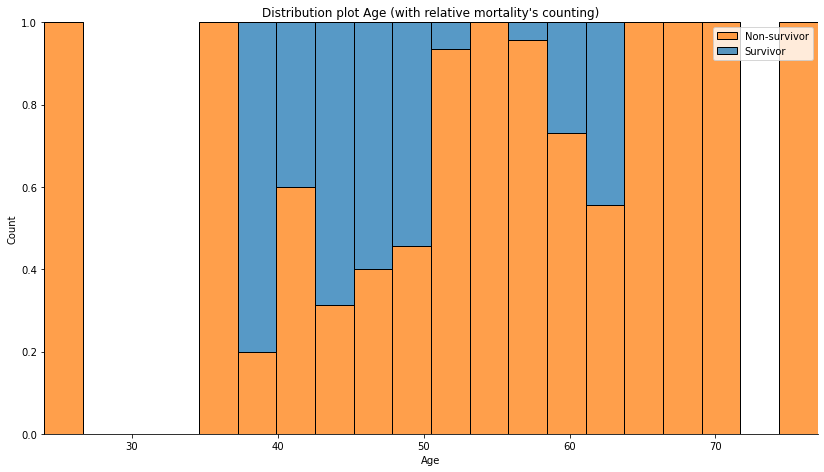

In [101]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.displot(data=df_numeric, x="Age", hue="Mortality", multiple="fill", height=6.5, aspect=16/9, legend=False)

# Setting plot's title
graph.set(title="Distribution plot Age (with relative mortality's counting)")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

### Gender

#### Univariate

<Figure size 1440x360 with 0 Axes>

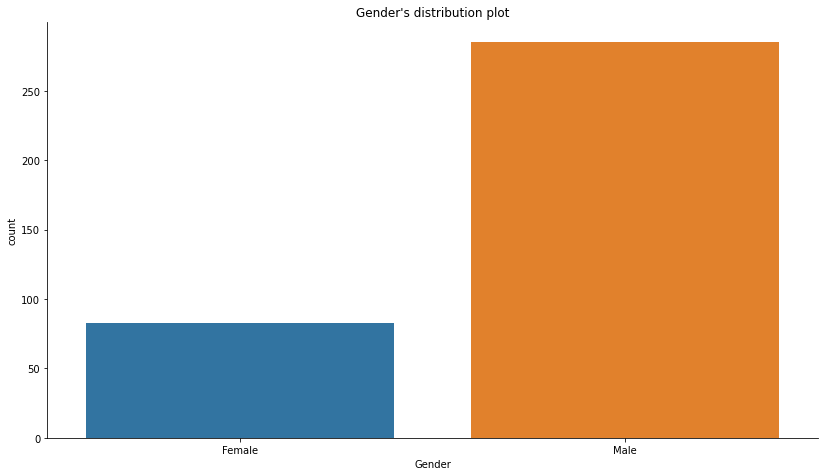

In [167]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric, x="Gender", kind="count", height=6.5, aspect=16/9)

# Setting plot's title
graph.set(title="Gender's distribution plot")

# Showing plot on JupyterNotebook
plt.show()

The chart shows that there are more Male individuals than Female ones on this dataset.

#### Bivariate

<Figure size 1440x360 with 0 Axes>

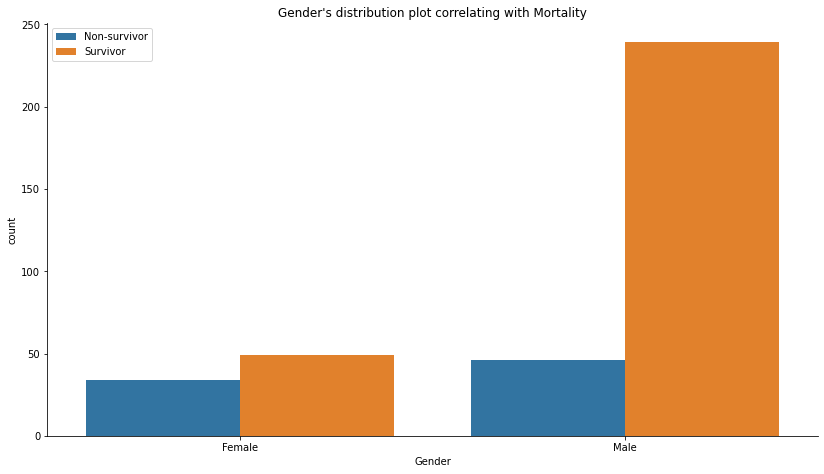

In [164]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric, x="Gender", kind="count", hue="Mortality", height=6.5, aspect=16/9, legend=False)

# Setting plot's title
graph.set(title="Gender's distribution plot correlating with Mortality")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

When we look at the gender diferences, We can see that "Male" tend to have a higher Mortality rate when compared with the "Female" category.

### *Heart Failure* Family History

#### Univariate

<Figure size 1440x360 with 0 Axes>

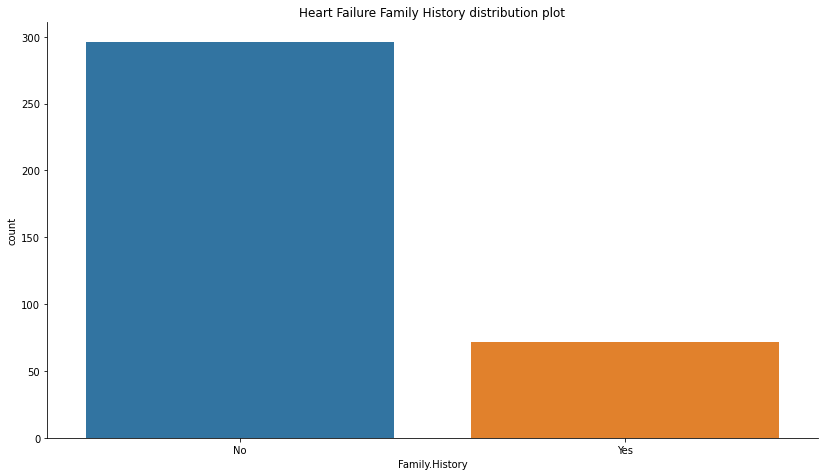

In [171]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Family.History", kind="count", height=6.5, aspect=16/9)

# Setting plot's title
graph.set(title="Heart Failure Family History distribution plot")

# Showing plot on JupyterNotebook
plt.show()

The majority of the individuals in this dataset don't have a Heart Failure Family History.

#### Bivariate

<Figure size 1440x360 with 0 Axes>

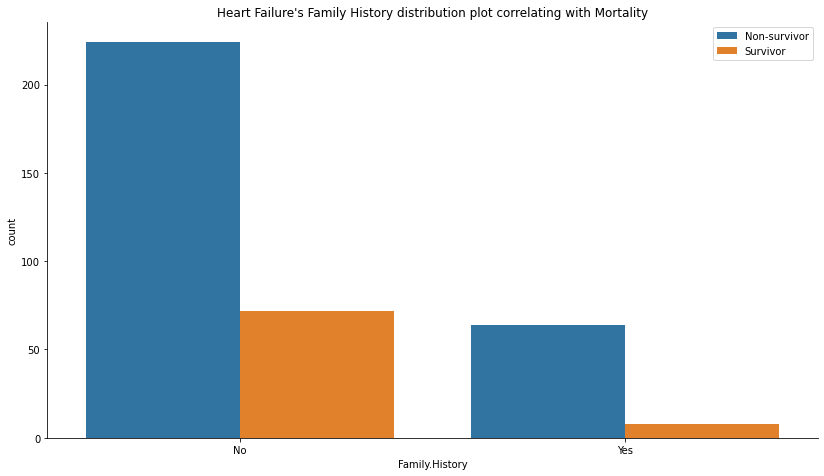

In [165]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Family.History", kind="count", hue="Mortality", height=6.5, aspect=16/9, legend=False)

# Setting plot's title
graph.set(title="Heart Failure's Family History distribution plot correlating with Mortality")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

This plot doesn't reveal great diferences or influences by the variables being considered. For this reason, I will try to establish a proportion relationship for each group (with Heart Failure family history, Family History = Yes; and without Heart Failure Family History, Family History = No).
<br>
Aligned by this propose, the proportions will be calculated dividing the number of non-survivors by the number of survivors.

In [179]:
# Data Frame with relative quantities for each situation (Fmaily History YES and NO)
df_family_hist = df_numeric[["Family.History", "Mortality"]]

# Quantities
#---- Family History == YES ----
#   Mortality == YES and Family History == YES
m_y_fm_y = df_family_hist[(df_family_hist["Mortality"] == 1) & (df_family_hist["Family.History"] == 1)].shape[0]

#   Mortality == NO and Family History == YES
m_n_fm_y = df_family_hist[(df_family_hist["Mortality"] == 0) & (df_family_hist["Family.History"] == 1)].shape[0]

#---- Family History == NO ----
#   Mortality == YES and Family History == NO
m_y_fm_n = df_family_hist[(df_family_hist["Mortality"] == 1) & (df_family_hist["Family.History"] == 0)].shape[0]

#   Mortality == NO and Family History == NO
m_n_fm_n = df_family_hist[(df_family_hist["Mortality"] == 0) & (df_family_hist["Family.History"] == 0)].shape[0]


print("The mortality proportion (non-survivor /survivor) by those who have heart failure family history is: " + str(m_y_fm_y/m_n_fm_y))
print('\n')
print("The mortality proportion (non-survivor /survivor) by those who don't have heart failure family history is: " + str(round(m_y_fm_n/m_n_fm_n,1)))


The mortality proportion (non-survivor /survivor) by those who have heart failure family history is: 8.0


The mortality proportion (non-survivor /survivor) by those who don't have heart failure family history is: 3.1


As we can see in the diference between the proportions above, those who have heart failure family history have as well a higer proportion of mortality, it **can be** a causality.

### Diabetes

#### Univariate

<Figure size 1440x360 with 0 Axes>

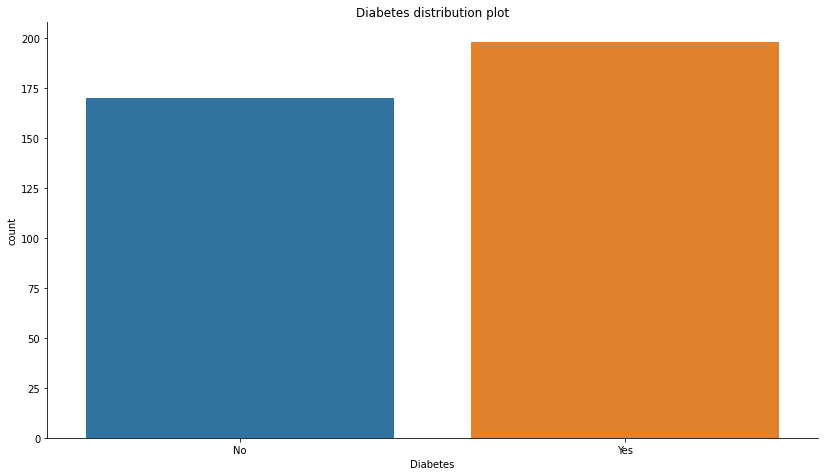

In [160]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Diabetes", kind="count", height=6.5, aspect=16/9)

# Setting plot's title
graph.set(title="Diabetes distribution plot")

# Showing plot on JupyterNotebook
plt.show()

There isn't great diferences, in terms of counting, between those who have and those who doesn't have diabetes on this dataset.

#### Bivariate

<Figure size 1440x360 with 0 Axes>

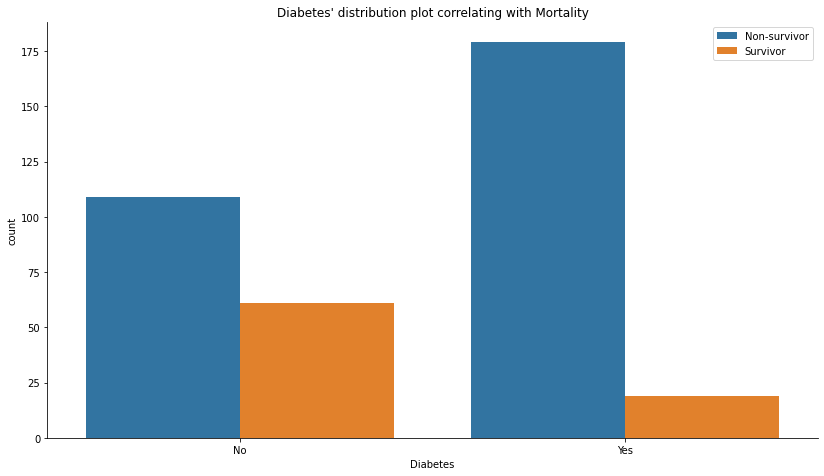

In [166]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Diabetes", kind="count", hue="Mortality", height=6.5, aspect=16/9, legend=False)

# Setting plot's title
graph.set(title="Diabetes' distribution plot correlating with Mortality")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

It's clear that the diabetics individuals had a smaller survival's rate when comparing with non-diabetics individuals.

### Smoking

#### Univariate

<Figure size 1440x360 with 0 Axes>

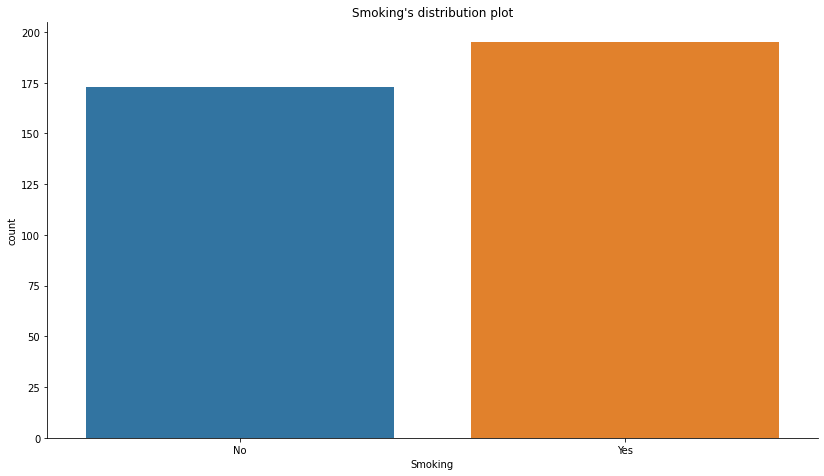

In [163]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Smoking", kind="count", height=6.5, aspect=16/9)

# Setting plot's title
graph.set(title="Smoking's distribution plot")

# Showing plot on JupyterNotebook
plt.show()

This plot is very similar with Diabetes' distribution plot, also there isn't great diferences, in terms of counting, between those who smokes and those who don't on this dataset.

#### Bivariate

<Figure size 1440x360 with 0 Axes>

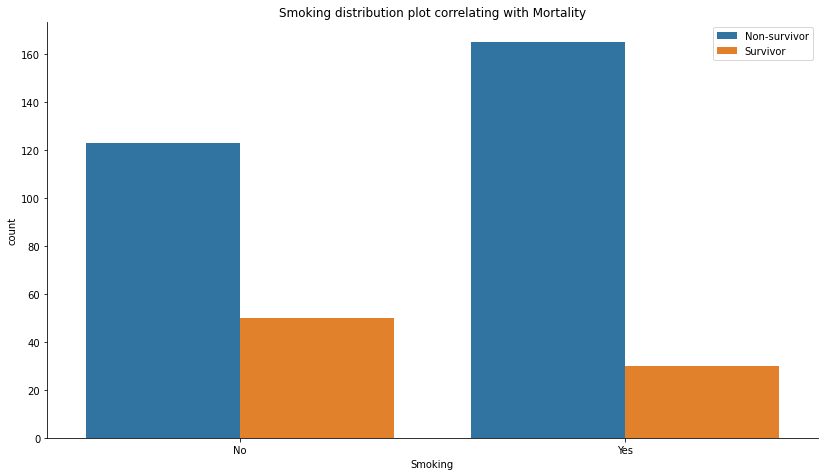

In [176]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.catplot(data=df_numeric.replace({1:"Yes", 0:"No"}), x="Smoking", kind="count", hue="Mortality", height=6.5, aspect=16/9, legend=False)

# Setting plot's title
graph.set(title="Smoking distribution plot correlating with Mortality")

# Plotting legend
plt.legend(labels=["Non-survivor","Survivor"])

# Showing plot on JupyterNotebook
plt.show()

Similarly with 'Heart Failure's Family History distribution plot correlating with Mortality', this plot needs to be normalized and analysed by its proportions for each group.

In [180]:
# Data Frame with relative quantities for each situation (Fmaily History YES and NO)
df_smoking = df_numeric[["Smoking", "Mortality"]]

# Quantities
#---- Smoking == YES ----
#   Mortality == YES and Smoking == YES
m_y_smk_y = df_smoking[(df_smoking["Mortality"] == 1) & (df_smoking["Smoking"] == 1)].shape[0]

#   Mortality == NO and Smoking == YES
m_n_smk_y = df_smoking[(df_smoking["Mortality"] == 0) & (df_smoking["Smoking"] == 1)].shape[0]

#---- Smoking == NO ----
#   Mortality == YES and Smoking == NO
m_y_smk_n = df_smoking[(df_smoking["Mortality"] == 1) & (df_smoking["Smoking"] == 0)].shape[0]

#   Mortality == NO and Smoking == NO
m_n_smk_n = df_smoking[(df_smoking["Mortality"] == 0) & (df_smoking["Smoking"] == 0)].shape[0]


print("The mortality proportion (non-survivor /survivor) by those who smoke is: " + str(m_y_smk_y/m_n_smk_y))
print('\n')
print("The mortality proportion (non-survivor /survivor) by those who don't smoke is: " + str(round(m_y_smk_n/m_n_smk_n,1)))


The mortality proportion (non-survivor /survivor) by those who smoke is: 5.5


The mortality proportion (non-survivor /survivor) by those who don't smoke is: 2.5


Consulting the proportions founded, it's possible to see how the mortality proportion is **higher** on those individuals that are smokers.

### Depression

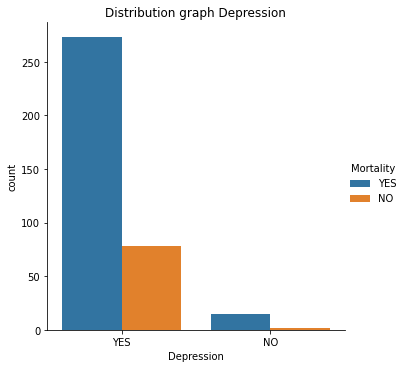

In [25]:
graph = sns.catplot(data=df_categorical, x="Depression", kind="count", hue="Mortality")

graph.set(title="Distribution graph Depression")

plt.show()

#### CPK

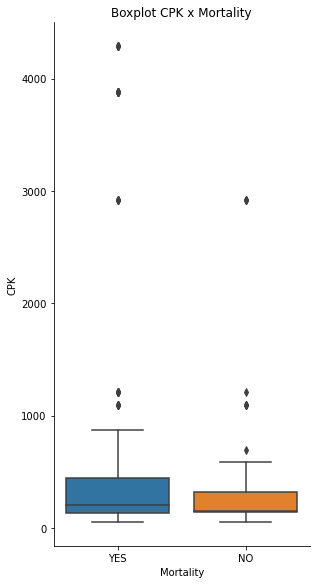

In [26]:
graph = sns.catplot(data=df_categorical, y="CPK", x="Mortality", kind="box",  height=8, aspect=9/16)

graph.set(title="Boxplot CPK x Mortality")

plt.show()

Looking through the boxplot, we can see some odd outliers for both the Mortality's groups. After a deeper research about this variable and what it means, some informations may be useful for better understanding it:
- The CPK (Creatine Phosphokinase) is an enzyme in the body.
    - It is found mainly in the heart, brain, and skeletal muscle.
- The Reference Range of the CPK Test
    - Adult Male: 21 to 232 IU/L
    - Adult Female: 21 to 215 IU/L
- High CPK levels may be an indication of damage to CK-rich tissue (like myocardial tissue)

As the outliers tend to increase our range of values, we are going to focus on visualysing the boxplot by recreating it below with a smaller range of y-axis.

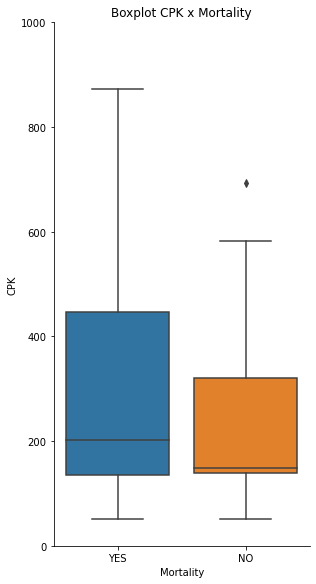

In [27]:
graph = sns.catplot(data=df_categorical, y="CPK", x="Mortality", kind="box",  height=8, aspect=9/16)

graph.set(title="Boxplot CPK x Mortality", ylim=(0,1000))

plt.show()

Now it's easier to notice the diference between the group's quartiles. The "YES-Mortality" group has a wider quartile distribution taking higher CPK levels when compared with the "NO-Mortality" group.
<br>
Still looking to explore this relationship, we're going to delete some outliers based on a z-score of 2 (that means that we will deal with the data that are up to 2 standard desviation from the mean).

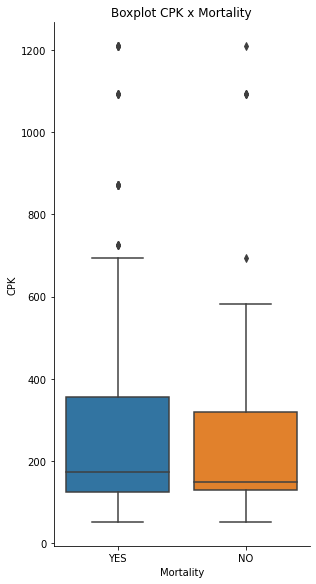

In [28]:
# New DataFrame with Mortality and CPK columns
df_cpk = df_categorical[["Mortality","CPK"]]

# Excluding outliers (Z-score > 2)
df_cpk = df_cpk[(np.abs(stats.zscore(df_cpk["CPK"])) < 2)]

# Plotting Graph
graph = sns.catplot(data=df_cpk, y="CPK", x="Mortality", kind="box",  height=8, aspect=9/16)

graph.set(title="Boxplot CPK x Mortality")

plt.show()

It looks like the diference between quartiles was reduced after we exclude the outliers (2 standard desviations distance).

#### Hemoglobin

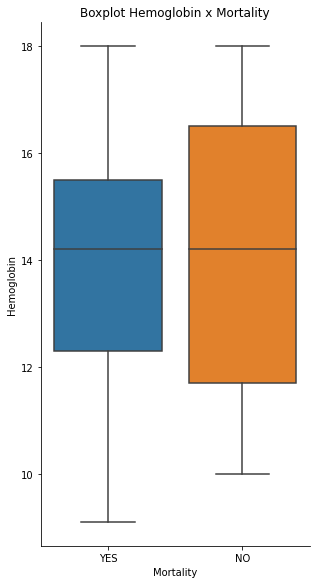

In [29]:
graph = sns.catplot(data=df_categorical, y="Hemoglobin", x="Mortality", kind="box",  height=8, aspect=9/16)

graph.set(title="Boxplot Hemoglobin x Mortality")

plt.show()

It seems that there aren't great diferences between the groups. The median are almost the same; the "NO-Mortality" has a wider range between Q1 and Q3, while the "YES-Mortality" reaches lower Hemoglobin levels.

#### Blood Pression Rest

#### Cholestoral

#### Max Heart Rate

### Analysing multiple relationships between variables

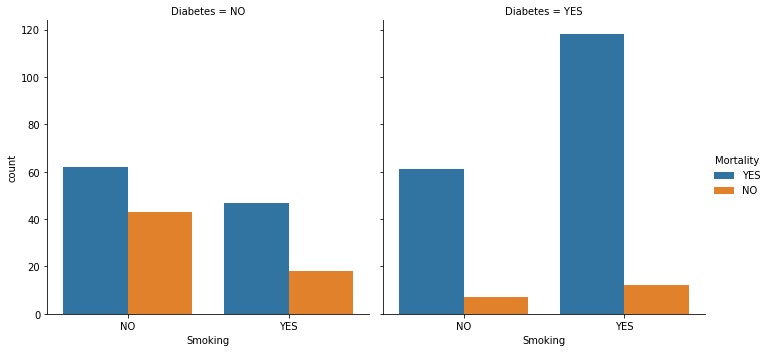

In [30]:
# Graph relating Diabetes, Smoking and Mortality
#TODO (This relational Graph may be showed later)
catplot_m_d_s = sns.catplot(data=df_categorical, x="Smoking", kind="count", hue="Mortality", col="Diabetes")

plt.show()

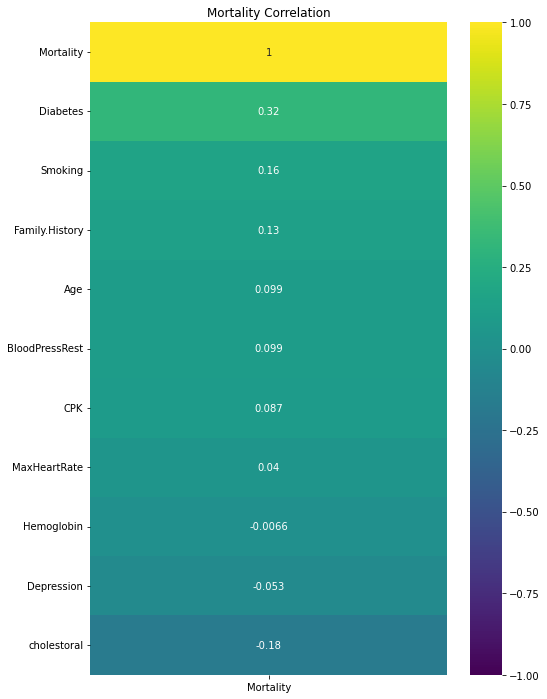

In [31]:
# Graph for the Pearson Correlation between "Mortality" and the others variables
# TODO (This graph may be later or change to a heatmap between all variables)
plt.figure(figsize=(8,12))

corr_mortality = df_numeric.corr()[['Mortality']].sort_values(by="Mortality", ascending=False)

heatmap = sns.heatmap(corr_mortality, vmax=1,vmin=-1, annot=True, cmap="viridis")

heatmap.set(title="Mortality Correlation")

plt.show()

In [32]:
#TODO
# Think about a scatter plot to relate variables